In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [4]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 150)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [5]:
import numpy as np
import random
while True:
    number_codes = []
    for i in range(2**(10-1), 2**10-1):
        for j in bin(i).split('b')[1]:
            number_codes.append(int(j))
    number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

    slice = random.sample(range(511),4)

    number_codes = number_codes[:,slice].tolist()

    classes = []
    for i in range(4):
        code_list = np.array(number_codes).T[i]
        classes.append(np.where(code_list==1)[0].tolist())

    matrix_errors = []

    for i in range(9):
        for j in range(i+1,10):
            matrix_errors.append(4 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
    min_error = np.min(matrix_errors)
    if min_error != 0:
        print(min_error)
        print(number_codes)
        break

1
[[1, 1, 1, 1], [1, 1, 0, 0], [0, 0, 1, 0], [1, 0, 1, 0], [1, 0, 0, 0], [0, 1, 1, 0], [0, 1, 1, 1], [0, 1, 0, 1], [1, 1, 1, 0], [1, 0, 0, 1]]


In [6]:
winner_list = []

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:970
number of class2:647

 ****** Running generation 0 ****** 

Population's average fitness: 0.47002 stdev: 0.09391
Best fitness: 0.73593 - size: (2, 13) - species 5 - id 152
Average adjusted fitness: 0.172
Mean genetic distance 2.876, standard deviation 0.458
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 5.960 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53874 stdev: 0.10082
Best fitness: 0.73593 - size: (2, 13) - species 4 - id 152
Average adjusted fitness: 0.249
Mean genetic distance 2.982, standard deviation 0.479
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 6.417 sec (6.188 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57241 stdev: 0.09208
Best fitness: 0.75881 - size: (4, 17) - species 4 - id 535
Average adjusted fitness: 0.269
Mean genetic distance 3.003, standard deviation 0.498
Population of 198 members in 28 species
Total extinctio

Population's average fitness: 0.63734 stdev: 0.10367
Best fitness: 0.81138 - size: (7, 24) - species 10 - id 2044
Average adjusted fitness: 0.294
Mean genetic distance 3.228, standard deviation 0.493
Population of 195 members in 31 species
Total extinctions: 0
Generation time: 6.999 sec (6.708 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.63564 stdev: 0.10839
Best fitness: 0.81138 - size: (7, 24) - species 10 - id 2044
Average adjusted fitness: 0.282
Mean genetic distance 3.239, standard deviation 0.502
Population of 191 members in 28 species
Total extinctions: 0
Generation time: 6.825 sec (6.739 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.61614 stdev: 0.12457
Best fitness: 0.81138 - size: (7, 24) - species 10 - id 2044
Average adjusted fitness: 0.314
Mean genetic distance 3.229, standard deviation 0.515
Population of 193 members in 26 species
Total extinctions: 0
Generation time: 6.749 sec (6.761 average)

 ******

Population's average fitness: 0.66127 stdev: 0.12280
Best fitness: 0.82808 - size: (10, 32) - species 44 - id 6396
Average adjusted fitness: 0.296
Mean genetic distance 3.222, standard deviation 0.586
Population of 195 members in 18 species
Total extinctions: 0
Generation time: 7.686 sec (7.693 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.63704 stdev: 0.13382
Best fitness: 0.82808 - size: (10, 32) - species 44 - id 6396
Average adjusted fitness: 0.343
Mean genetic distance 3.210, standard deviation 0.587
Population of 202 members in 17 species
Total extinctions: 0
Generation time: 7.689 sec (7.708 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.64823 stdev: 0.13620
Best fitness: 0.82808 - size: (10, 32) - species 44 - id 6396
Average adjusted fitness: 0.396
Mean genetic distance 3.207, standard deviation 0.579
Population of 203 members in 18 species
Total extinctions: 0
Generation time: 8.061 sec (7.762 average)

 ***

Population's average fitness: 0.68297 stdev: 0.12317
Best fitness: 0.82808 - size: (10, 32) - species 44 - id 6396
Average adjusted fitness: 0.375
Mean genetic distance 3.214, standard deviation 0.599
Population of 203 members in 18 species
Total extinctions: 0
Generation time: 9.547 sec (9.531 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.66255 stdev: 0.13337
Best fitness: 0.82808 - size: (10, 32) - species 44 - id 6396
Average adjusted fitness: 0.308
Mean genetic distance 3.214, standard deviation 0.578
Population of 204 members in 18 species
Total extinctions: 0
Generation time: 9.492 sec (9.640 average)

 ****** Running generation 75 ****** 

Population's average fitness: 0.68328 stdev: 0.12922
Best fitness: 0.83302 - size: (11, 35) - species 44 - id 11407
Average adjusted fitness: 0.335
Mean genetic distance 3.261, standard deviation 0.572
Population of 194 members in 17 species
Total extinctions: 0
Generation time: 9.982 sec (9.799 average)

 **

Population's average fitness: 0.68394 stdev: 0.12702
Best fitness: 0.84663 - size: (14, 42) - species 44 - id 12865
Average adjusted fitness: 0.346
Mean genetic distance 3.275, standard deviation 0.598
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 11.128 sec (9.875 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.68477 stdev: 0.11717
Best fitness: 0.84663 - size: (14, 42) - species 44 - id 12865
Average adjusted fitness: 0.285
Mean genetic distance 3.277, standard deviation 0.606
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 10.655 sec (10.012 average)

 ****** Running generation 99 ****** 

Population's average fitness: 0.67779 stdev: 0.12347
Best fitness: 0.84663 - size: (14, 42) - species 44 - id 12865
Average adjusted fitness: 0.342
Mean genetic distance 3.276, standard deviation 0.637
Population of 195 members in 16 species
Total extinctions: 0
Generation time: 10.360 sec (10.105 averag

Population's average fitness: 0.69089 stdev: 0.13069
Best fitness: 0.85467 - size: (15, 44) - species 44 - id 15924
Average adjusted fitness: 0.320
Mean genetic distance 3.277, standard deviation 0.590
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 10.001 sec (10.508 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.68288 stdev: 0.13607
Best fitness: 0.85467 - size: (15, 44) - species 44 - id 15924
Average adjusted fitness: 0.377
Mean genetic distance 3.274, standard deviation 0.584
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 10.265 sec (10.468 average)

 ****** Running generation 123 ****** 

Population's average fitness: 0.69638 stdev: 0.13384
Best fitness: 0.85467 - size: (15, 44) - species 44 - id 15924
Average adjusted fitness: 0.311
Mean genetic distance 3.279, standard deviation 0.585
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 10.030 sec (10.462 ave

Population's average fitness: 0.67959 stdev: 0.13328
Best fitness: 0.85467 - size: (15, 44) - species 44 - id 15924
Average adjusted fitness: 0.340
Mean genetic distance 3.153, standard deviation 0.594
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 11.325 sec (11.232 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.69237 stdev: 0.12105
Best fitness: 0.85467 - size: (15, 44) - species 44 - id 15924
Average adjusted fitness: 0.368
Mean genetic distance 3.176, standard deviation 0.582
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 11.505 sec (11.230 average)

 ****** Running generation 147 ****** 

Population's average fitness: 0.67727 stdev: 0.14229
Best fitness: 0.85467 - size: (15, 44) - species 44 - id 15924
Average adjusted fitness: 0.338
Mean genetic distance 3.156, standard deviation 0.597
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 11.337 sec (11.234 ave

Mean genetic distance 3.172, standard deviation 0.514
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 7.335 sec (7.511 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.60035 stdev: 0.09588
Best fitness: 0.76067 - size: (10, 29) - species 8 - id 3111
Average adjusted fitness: 0.237
Mean genetic distance 3.194, standard deviation 0.516
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 7.473 sec (7.502 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.61035 stdev: 0.09173
Best fitness: 0.76500 - size: (11, 30) - species 8 - id 3271
Average adjusted fitness: 0.231
Mean genetic distance 3.217, standard deviation 0.508
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 7.896 sec (7.574 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.61382 stdev: 0.09108
Best fitness: 0.76994 - size: (12, 32) - species 8 - id 3415


Mean genetic distance 3.245, standard deviation 0.529
Population of 203 members in 23 species
Total extinctions: 0
Generation time: 8.040 sec (8.167 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.61727 stdev: 0.10608
Best fitness: 0.77180 - size: (12, 33) - species 8 - id 4438
Average adjusted fitness: 0.335
Mean genetic distance 3.244, standard deviation 0.546
Population of 197 members in 22 species
Total extinctions: 0
Generation time: 8.495 sec (8.202 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.61693 stdev: 0.10305
Best fitness: 0.77180 - size: (12, 33) - species 8 - id 4438
Average adjusted fitness: 0.317
Mean genetic distance 3.242, standard deviation 0.545
Population of 192 members in 20 species
Total extinctions: 0
Generation time: 8.359 sec (8.251 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.60953 stdev: 0.10891
Best fitness: 0.77180 - size: (12, 33) - species 8 - id 4438


Mean genetic distance 3.275, standard deviation 0.579
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 8.148 sec (8.191 average)

 ****** Running generation 68 ****** 

Population's average fitness: 0.64094 stdev: 0.09869
Best fitness: 0.77675 - size: (13, 36) - species 8 - id 8920
Average adjusted fitness: 0.245
Mean genetic distance 3.287, standard deviation 0.583
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 8.272 sec (8.204 average)

 ****** Running generation 69 ****** 

Population's average fitness: 0.63098 stdev: 0.10530
Best fitness: 0.77675 - size: (13, 36) - species 8 - id 8920
Average adjusted fitness: 0.244
Mean genetic distance 3.287, standard deviation 0.590
Population of 202 members in 20 species
Total extinctions: 0
Generation time: 8.130 sec (8.224 average)

 ****** Running generation 70 ****** 

Population's average fitness: 0.62295 stdev: 0.11511
Best fitness: 0.77675 - size: (13, 36) - species 8 - id 8920


Mean genetic distance 3.171, standard deviation 0.580
Population of 203 members in 19 species
Total extinctions: 0
Generation time: 9.336 sec (9.889 average)

 ****** Running generation 92 ****** 

Population's average fitness: 0.65366 stdev: 0.10728
Best fitness: 0.78479 - size: (13, 41) - species 50 - id 11848
Average adjusted fitness: 0.281
Mean genetic distance 3.186, standard deviation 0.584
Population of 196 members in 18 species
Total extinctions: 0
Generation time: 9.837 sec (9.700 average)

 ****** Running generation 93 ****** 

Population's average fitness: 0.63705 stdev: 0.11442
Best fitness: 0.78479 - size: (13, 41) - species 50 - id 11848
Average adjusted fitness: 0.244
Mean genetic distance 3.219, standard deviation 0.594
Population of 196 members in 17 species
Total extinctions: 0
Generation time: 9.656 sec (9.676 average)

 ****** Running generation 94 ****** 

Population's average fitness: 0.63934 stdev: 0.11381
Best fitness: 0.78479 - size: (13, 41) - species 50 - id 

Population's average fitness: 0.64487 stdev: 0.11530
Best fitness: 0.78479 - size: (13, 41) - species 50 - id 11848
Average adjusted fitness: 0.269
Mean genetic distance 3.192, standard deviation 0.612
Population of 204 members in 13 species
Total extinctions: 0
Generation time: 14.135 sec (12.004 average)

 ****** Running generation 116 ****** 

Population's average fitness: 0.65833 stdev: 0.10589
Best fitness: 0.78479 - size: (13, 41) - species 50 - id 11848
Average adjusted fitness: 0.253
Mean genetic distance 3.261, standard deviation 0.606
Population of 196 members in 12 species
Total extinctions: 0
Generation time: 16.810 sec (12.679 average)

 ****** Running generation 117 ****** 

Population's average fitness: 0.65643 stdev: 0.11020
Best fitness: 0.78973 - size: (18, 51) - species 61 - id 18776
Average adjusted fitness: 0.259
Mean genetic distance 3.262, standard deviation 0.627
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 17.595 sec (13.372 ave

Population's average fitness: 0.64774 stdev: 0.10724
Best fitness: 0.80087 - size: (18, 49) - species 61 - id 22533
Average adjusted fitness: 0.246
Mean genetic distance 3.115, standard deviation 0.641
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 13.532 sec (12.510 average)

 ****** Running generation 140 ****** 

Population's average fitness: 0.64667 stdev: 0.11054
Best fitness: 0.80087 - size: (18, 49) - species 61 - id 22533
Average adjusted fitness: 0.251
Mean genetic distance 3.126, standard deviation 0.619
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 12.531 sec (12.497 average)

 ****** Running generation 141 ****** 

Population's average fitness: 0.64110 stdev: 0.11517
Best fitness: 0.80087 - size: (18, 49) - species 61 - id 22533
Average adjusted fitness: 0.238
Mean genetic distance 3.141, standard deviation 0.627
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 12.241 sec (12.466 ave

Population's average fitness: 0.62663 stdev: 0.10692
Best fitness: 0.80396 - size: (4, 16) - species 6 - id 1870
Average adjusted fitness: 0.268
Mean genetic distance 3.216, standard deviation 0.490
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 7.233 sec (6.738 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.63125 stdev: 0.10449
Best fitness: 0.80396 - size: (4, 16) - species 6 - id 1870
Average adjusted fitness: 0.261
Mean genetic distance 3.243, standard deviation 0.485
Population of 194 members in 39 species
Total extinctions: 0
Generation time: 7.110 sec (6.826 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.64309 stdev: 0.09684
Best fitness: 0.80396 - size: (4, 16) - species 6 - id 1870
Average adjusted fitness: 0.274
Mean genetic distance 3.240, standard deviation 0.484
Population of 195 members in 40 species
Total extinctions: 0
Generation time: 6.959 sec (6.881 average)

 ****** Ru

Population's average fitness: 0.65478 stdev: 0.12112
Best fitness: 0.83488 - size: (6, 20) - species 6 - id 4615
Average adjusted fitness: 0.256
Mean genetic distance 3.239, standard deviation 0.496
Population of 193 members in 29 species
Total extinctions: 0
Generation time: 8.218 sec (8.167 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.65933 stdev: 0.11778
Best fitness: 0.83488 - size: (6, 20) - species 6 - id 4615
Average adjusted fitness: 0.353
Mean genetic distance 3.257, standard deviation 0.514
Population of 197 members in 28 species
Total extinctions: 0
Generation time: 8.224 sec (8.173 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.66313 stdev: 0.11596
Best fitness: 0.83735 - size: (12, 33) - species 28 - id 5453
Average adjusted fitness: 0.314
Mean genetic distance 3.267, standard deviation 0.508
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 8.306 sec (8.206 average)

 ****** 

Population's average fitness: 0.65281 stdev: 0.13016
Best fitness: 0.85281 - size: (12, 34) - species 28 - id 6324
Average adjusted fitness: 0.300
Mean genetic distance 3.225, standard deviation 0.583
Population of 197 members in 19 species
Total extinctions: 0
Generation time: 9.917 sec (9.190 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.66316 stdev: 0.12080
Best fitness: 0.85281 - size: (12, 34) - species 28 - id 6324
Average adjusted fitness: 0.310
Mean genetic distance 3.225, standard deviation 0.578
Population of 194 members in 19 species
Total extinctions: 0
Generation time: 9.461 sec (9.218 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.66403 stdev: 0.12575
Best fitness: 0.85281 - size: (12, 34) - species 28 - id 6324
Average adjusted fitness: 0.287
Mean genetic distance 3.199, standard deviation 0.585
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 9.335 sec (9.263 average)

 ***

Population's average fitness: 0.67800 stdev: 0.12150
Best fitness: 0.85281 - size: (10, 29) - species 59 - id 12716
Average adjusted fitness: 0.351
Mean genetic distance 3.153, standard deviation 0.602
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 10.068 sec (9.632 average)

 ****** Running generation 86 ****** 

Population's average fitness: 0.66987 stdev: 0.13504
Best fitness: 0.85281 - size: (10, 29) - species 59 - id 12716
Average adjusted fitness: 0.383
Mean genetic distance 3.166, standard deviation 0.579
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 10.391 sec (9.719 average)

 ****** Running generation 87 ****** 

Population's average fitness: 0.65811 stdev: 0.12728
Best fitness: 0.85281 - size: (10, 29) - species 59 - id 12716
Average adjusted fitness: 0.326
Mean genetic distance 3.198, standard deviation 0.550
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 10.049 sec (9.796 average)

Population's average fitness: 0.70377 stdev: 0.14310
Best fitness: 0.85838 - size: (12, 32) - species 70 - id 16534
Average adjusted fitness: 0.396
Mean genetic distance 3.173, standard deviation 0.586
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 12.614 sec (10.872 average)

 ****** Running generation 110 ****** 

Population's average fitness: 0.71675 stdev: 0.12933
Best fitness: 0.85838 - size: (12, 32) - species 70 - id 16534
Average adjusted fitness: 0.475
Mean genetic distance 3.174, standard deviation 0.568
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 10.554 sec (10.891 average)

 ****** Running generation 111 ****** 

Population's average fitness: 0.71199 stdev: 0.13543
Best fitness: 0.85838 - size: (12, 32) - species 70 - id 16534
Average adjusted fitness: 0.377
Mean genetic distance 3.195, standard deviation 0.577
Population of 194 members in 17 species
Total extinctions: 0
Generation time: 11.062 sec (10.976 ave

Population's average fitness: 0.68771 stdev: 0.14778
Best fitness: 0.86085 - size: (15, 36) - species 76 - id 19083
Average adjusted fitness: 0.398
Mean genetic distance 3.079, standard deviation 0.588
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 11.542 sec (11.212 average)

 ****** Running generation 134 ****** 

Population's average fitness: 0.69482 stdev: 0.13623
Best fitness: 0.86085 - size: (15, 36) - species 76 - id 19083
Average adjusted fitness: 0.312
Mean genetic distance 3.050, standard deviation 0.595
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 11.836 sec (11.332 average)

 ****** Running generation 135 ****** 

Population's average fitness: 0.70031 stdev: 0.13410
Best fitness: 0.86085 - size: (15, 36) - species 76 - id 19083
Average adjusted fitness: 0.314
Mean genetic distance 3.014, standard deviation 0.612
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 11.914 sec (11.454 aver

Mean genetic distance 3.148, standard deviation 0.514
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 6.424 sec (6.016 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.62038 stdev: 0.08324
Best fitness: 0.75448 - size: (3, 17) - species 18 - id 1208
Average adjusted fitness: 0.341
Mean genetic distance 3.144, standard deviation 0.511
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 6.498 sec (6.076 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.61950 stdev: 0.08634
Best fitness: 0.76500 - size: (3, 18) - species 18 - id 1355
Average adjusted fitness: 0.240
Mean genetic distance 3.181, standard deviation 0.524
Population of 206 members in 38 species
Total extinctions: 0
Generation time: 6.510 sec (6.124 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.63010 stdev: 0.08032
Best fitness: 0.76500 - size: (3, 18) - species 18 - id 1355
Ave

Mean genetic distance 3.148, standard deviation 0.519
Population of 196 members in 30 species
Total extinctions: 0
Generation time: 7.663 sec (7.450 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.64971 stdev: 0.09867
Best fitness: 0.77304 - size: (4, 18) - species 18 - id 3396
Average adjusted fitness: 0.329
Mean genetic distance 3.127, standard deviation 0.514
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 8.648 sec (7.603 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.65436 stdev: 0.10421
Best fitness: 0.77304 - size: (4, 18) - species 18 - id 3396
Average adjusted fitness: 0.313
Mean genetic distance 3.129, standard deviation 0.518
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 7.858 sec (7.669 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.65589 stdev: 0.09754
Best fitness: 0.77304 - size: (4, 18) - species 18 - id 3396


Mean genetic distance 3.209, standard deviation 0.589
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 9.830 sec (9.880 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.64860 stdev: 0.10944
Best fitness: 0.79839 - size: (8, 28) - species 40 - id 5633
Average adjusted fitness: 0.276
Mean genetic distance 3.175, standard deviation 0.588
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 9.903 sec (9.945 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.65475 stdev: 0.10055
Best fitness: 0.79839 - size: (8, 28) - species 40 - id 5633
Average adjusted fitness: 0.283
Mean genetic distance 3.210, standard deviation 0.576
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 9.243 sec (9.921 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.64829 stdev: 0.10856
Best fitness: 0.79839 - size: (8, 28) - species 40 - id 5633


Mean genetic distance 3.211, standard deviation 0.658
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 11.683 sec (11.027 average)

 ****** Running generation 79 ****** 

Population's average fitness: 0.66341 stdev: 0.10203
Best fitness: 0.79839 - size: (8, 28) - species 40 - id 5633
Average adjusted fitness: 0.335
Mean genetic distance 3.193, standard deviation 0.656
Population of 204 members in 14 species
Total extinctions: 0
Generation time: 11.212 sec (11.003 average)

 ****** Running generation 80 ****** 

Population's average fitness: 0.65439 stdev: 0.10502
Best fitness: 0.81818 - size: (11, 32) - species 45 - id 12369
Average adjusted fitness: 0.371
Mean genetic distance 3.185, standard deviation 0.664
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 10.703 sec (11.042 average)

 ****** Running generation 81 ****** 

Population's average fitness: 0.65177 stdev: 0.10751
Best fitness: 0.81818 - size: (11, 32) - species 45 -

Population's average fitness: 0.65616 stdev: 0.10723
Best fitness: 0.81818 - size: (11, 32) - species 45 - id 12369
Average adjusted fitness: 0.293
Mean genetic distance 3.096, standard deviation 0.595
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 11.523 sec (11.822 average)

 ****** Running generation 103 ****** 

Population's average fitness: 0.64520 stdev: 0.10926
Best fitness: 0.81818 - size: (11, 32) - species 45 - id 12369
Average adjusted fitness: 0.243
Mean genetic distance 3.166, standard deviation 0.583
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 11.274 sec (11.766 average)

 ****** Running generation 104 ****** 

Population's average fitness: 0.64361 stdev: 0.10737
Best fitness: 0.81818 - size: (11, 32) - species 45 - id 12369
Average adjusted fitness: 0.314
Mean genetic distance 3.185, standard deviation 0.582
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 11.243 sec (11.708 ave

Population's average fitness: 0.65206 stdev: 0.10849
Best fitness: 0.82127 - size: (13, 35) - species 45 - id 18389
Average adjusted fitness: 0.328
Mean genetic distance 3.031, standard deviation 0.564
Population of 194 members in 16 species
Total extinctions: 0
Generation time: 10.647 sec (10.924 average)

 ****** Running generation 127 ****** 

Population's average fitness: 0.65020 stdev: 0.11318
Best fitness: 0.82127 - size: (13, 35) - species 45 - id 18389
Average adjusted fitness: 0.326
Mean genetic distance 3.044, standard deviation 0.552
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 10.364 sec (10.820 average)

 ****** Running generation 128 ****** 

Population's average fitness: 0.66064 stdev: 0.09335
Best fitness: 0.82127 - size: (13, 35) - species 45 - id 18389
Average adjusted fitness: 0.282
Mean genetic distance 3.014, standard deviation 0.561
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 10.533 sec (10.696 ave

In [7]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [8]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [9]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(4):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(4 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.4722222222222222

In [10]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  2  2  3  5  2  0  5]
 [ 0 11  0  0 16  3  0  4  3  2]
 [ 0  0  9  0  0  0  0  0  0  0]
 [ 0  0  6 11  0  0  0  0  0  5]
 [ 0  1  0  0  0  0  0  0  0  0]
 [ 0  1  0  1  0  2  3  3  0  0]
 [ 0  0  0  0  0  2  8  0  0  0]
 [ 0  0  0  0  1  4  1 10  1  1]
 [ 0  6  2  4  1  4  1  0 13  0]
 [ 0  0  0  0  0  0  0  0  0  5]]


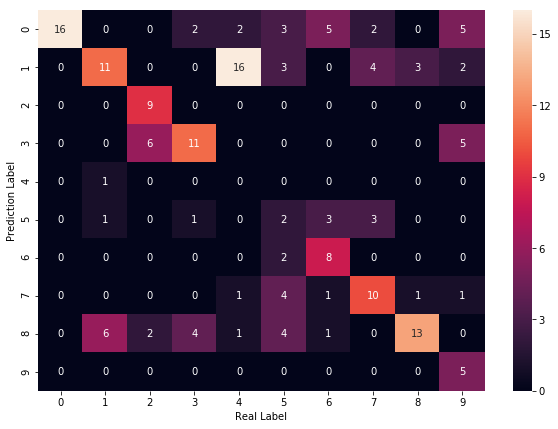

In [11]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [12]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:0 index:[8] real:5
#1 min_error:0 index:[3] real:2
#2 min_error:0 index:[1] real:8
#3 min_error:0 index:[0] real:0
#4 min_error:0 index:[1] real:1
#5 min_error:1 index:[1 5 7] real:7
#6 min_error:0 index:[7] real:6
#7 min_error:0 index:[3] real:3
#8 min_error:0 index:[2] real:2
#9 min_error:0 index:[4] real:1
#10 min_error:0 index:[0] real:7
#11 min_error:0 index:[1] real:4
#12 min_error:0 index:[0] real:6
#13 min_error:0 index:[3] real:3
#14 min_error:0 index:[1] real:1
#15 min_error:0 index:[3] real:3
#16 min_error:0 index:[1] real:9
#17 min_error:0 index:[1] real:1
#18 min_error:0 index:[1] real:7
#19 min_error:0 index:[6] real:6
#20 min_error:0 index:[1] real:8
#21 min_error:1 index:[0 1 7 9] real:4
#22 min_error:0 index:[3] real:3
#23 min_error:0 index:[1] real:1
#24 min_error:1 index:[0 1 7 9] real:4
#25 min_error:0 index:[0] real:0
#26 min_error:0 index:[1] real:5
#27 min_error:0 index:[3] real:3
#28 min_error:0 index:[0] real:6
#29 min_error:0 index:[9] real:9
#30 

In [13]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(4):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.5553494124922697
Avg Base Learner:0.8344155844155844


In [14]:
from random import randint

list_acc = []

for iii in range(4):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

Accuracy on training set: 0.08333333333333333
Accuracy on training set: 0.17222222222222222
Accuracy on training set: 0.2777777777777778
Accuracy on training set: 0.35


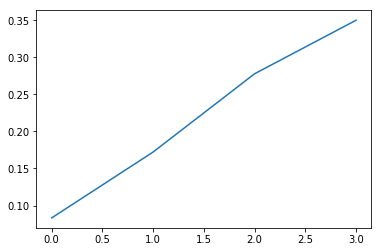

In [15]:
plt.plot(range(4),list_acc)
plt.show()

In [16]:
list_acc

[0.08333333333333333, 0.17222222222222222, 0.2777777777777778, 0.35]